Вы получили основные навыки обработки данных, теперь пора испытать их на практике. Сейчас вам предстоит заняться задачей классификации.

Представлен датасет центра приюта животных, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).

Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.
7. Не забывайте, что у вас есть PCA (Метод главных компонент). Он может пригодиться.

Вспомните о всем, что я говорил на предыдущих занятиях. Не все будет пригодится, но в жизни вам никто не будет говорить, что использовать :)

Хорошим классификатором для этой задачи будет "Случайный лес" (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Понимать суть работы "леса" не обязательно на данном этапе, но качество предсказаний будет выше, чем с линейным классификатором. (если желаете, вот гайд https://adataanalyst.com/scikit-learn/linear-classification-method/)

Желаю успеха :)

- 'age_upon_outcome' - возраст на день приема
- 'animal_id' -  индекс животного
- 'animal_type' - тип животного
- 'breed' - заводчик
- 'color' - масть
- 'date_of_birth' - дата рождения
- 'monthyear'- месяц-год
- 'datetime' - дата приема
- 'name' - имя
- 'outcome_subtype' - подтип результата
- 'outcome_type' - тип результата
- 'sex_upon_outcome' - пол в итоге

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt

## 1. Проверка наличия/обработка пропусков

In [145]:
data = pd.read_csv('дз/data/aac_shelter_outcomes.csv')
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
age_upon_outcome    78248 non-null object
animal_id           78256 non-null object
animal_type         78256 non-null object
breed               78256 non-null object
color               78256 non-null object
date_of_birth       78256 non-null object
datetime            78256 non-null object
monthyear           78256 non-null object
name                54370 non-null object
outcome_subtype     35963 non-null object
outcome_type        78244 non-null object
sex_upon_outcome    78254 non-null object
dtypes: object(12)
memory usage: 7.2+ MB


In [147]:
# одинаковые по содержанию столбцы - datetime и monthyear
# не интересен animal_id
# можно получить при необходимости age_upon_outcome = datetime - date_of_birth
colomn_for_drop = ['monthyear','animal_id','age_upon_outcome']
data = data.drop(colomn_for_drop, axis = 1)
data.head(7)

,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome
0,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown
5,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male
6,Other,Squirrel Mix,Tan,2013-12-13T00:00:00,2014-12-13T12:20:00,NaN,Suffering,Euthanasia,Unknown


In [148]:
# основные статистические характеристики данных с учетом текстовых данных include='all'
data.describe(include='all').transpose()

,count,unique,top,freq
animal_type,78256,5,Dog,44242
breed,78256,2128,Domestic Shorthair Mix,23335
color,78256,525,Black/White,8153
date_of_birth,78256,5869,2014-05-05T00:00:00,112
datetime,78256,64361,2016-04-18T00:00:00,39
name,54370,14574,Bella,344
outcome_subtype,35963,19,Partner,19660
outcome_type,78244,9,Adoption,33112
sex_upon_outcome,78254,5,Neutered Male,27784


In [149]:
data.outcome_type.unique()

array(['Transfer', 'Adoption', 'Euthanasia', 'Return to Owner', 'Died',
       'Disposal', 'Relocate', 'Missing', nan, 'Rto-Adopt'], dtype=object)

In [150]:
# подсчет уникальных значений столбца данных outcome_type - 
# всего 78244 значений
data.outcome_type.value_counts()

Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
Name: outcome_type, dtype: int64

## 3. Попробуйте создать свои признаки

In [151]:
# Удаление дубликатов (оказалось 10 дубликатов)
#data.drop_duplicates().shape

In [152]:
# удалить строчки датафрейма data в которых присутствует nan 
#data.dropna(subset=['outcome_type'])
#data.dropna(inplace=True)
#data.info()

In [153]:
# подготока к кодированию признаков
data_enc=data
data_enc.head(3)

,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome
0,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male


In [154]:
# Кодируем девять категориальных признаков

labelEnc = LabelEncoder()
columns_for_encode = ['outcome_type','animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'name', 'outcome_subtype','sex_upon_outcome']
for column in columns_for_encode:
    data_enc[column + "_enc"] = labelEnc.fit_transform(data[column].astype(str))
    
data_enc.head(3)

,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,outcome_type_enc,animal_type_enc,breed_enc,color_enc,date_of_birth_enc,datetime_enc,name_enc,outcome_subtype_enc,sex_upon_outcome_enc
0,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,8,1,937,321,4624,12401,14574,12,1
1,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,8,2,255,474,4016,1642,10514,12,3
2,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,0,2,1613,119,4161,9927,2620,19,2


## 4. Удалите лишние

In [155]:
# получим данные без категориальных столбцов (закодированные)
df2 = data_enc.drop(columns_for_encode, axis = 1)
df2.head(7)

,outcome_type_enc,animal_type_enc,breed_enc,color_enc,date_of_birth_enc,datetime_enc,name_enc,outcome_subtype_enc,sex_upon_outcome_enc
0,8,1,937,321,4624,12401,14574,12,1
1,8,2,255,474,4016,1642,10514,12,3
2,0,2,1613,119,4161,9927,2620,19,2
3,8,2,1468,463,1401,10447,11138,12,2
4,3,4,253,122,4443,11509,14574,14,4
5,8,2,1345,182,4225,272,1588,12,1
6,3,4,1961,402,4418,18589,14574,17,4


In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 9 columns):
outcome_type_enc        78256 non-null int64
animal_type_enc         78256 non-null int64
breed_enc               78256 non-null int64
color_enc               78256 non-null int64
date_of_birth_enc       78256 non-null int64
datetime_enc            78256 non-null int64
name_enc                78256 non-null int64
outcome_subtype_enc     78256 non-null int64
sex_upon_outcome_enc    78256 non-null int64
dtypes: int64(9)
memory usage: 5.4 MB


In [157]:
# целевой признак (уникальные элементы целевого признака)
# Таргет значение представим в виде наименований классов.

df2.outcome_type_enc.unique()

array([8, 0, 3, 6, 1, 2, 5, 4, 9, 7])

In [158]:
# удалить строчки датафрейма df2 в которых в столбце  outcome_type присутствует nan 
df2.dropna(subset=['outcome_type_enc']).head()

,outcome_type_enc,animal_type_enc,breed_enc,color_enc,date_of_birth_enc,datetime_enc,name_enc,outcome_subtype_enc,sex_upon_outcome_enc
0,8,1,937,321,4624,12401,14574,12,1
1,8,2,255,474,4016,1642,10514,12,3
2,0,2,1613,119,4161,9927,2620,19,2
3,8,2,1468,463,1401,10447,11138,12,2
4,3,4,253,122,4443,11509,14574,14,4


In [159]:
df2.dropna(inplace=True)

In [160]:
# было в датасете 78256, а после удаления строк с nan - стало 78244. Строк с nan оказалось 12 - это 0.15%
#print(12/782.56)
#df2.info()
# nan заменилось в процессе кодирования, причем во всем датасете

In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78256 entries, 0 to 78255
Data columns (total 9 columns):
outcome_type_enc        78256 non-null int64
animal_type_enc         78256 non-null int64
breed_enc               78256 non-null int64
color_enc               78256 non-null int64
date_of_birth_enc       78256 non-null int64
datetime_enc            78256 non-null int64
name_enc                78256 non-null int64
outcome_subtype_enc     78256 non-null int64
sex_upon_outcome_enc    78256 non-null int64
dtypes: int64(9)
memory usage: 6.0 MB


In [162]:
# количество строк с 'Adoption' в данных
len(df2[df2['outcome_type_enc'] == 0])

33112

In [163]:
# количество строк с 'Transfer' в данных
len(df2[df2['outcome_type_enc'] == 8])

23499

In [166]:
#
df2 = df2.loc[df2['outcome_type_enc'] !=9]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78244 entries, 0 to 78255
Data columns (total 9 columns):
outcome_type_enc        78244 non-null int64
animal_type_enc         78244 non-null int64
breed_enc               78244 non-null int64
color_enc               78244 non-null int64
date_of_birth_enc       78244 non-null int64
datetime_enc            78244 non-null int64
name_enc                78244 non-null int64
outcome_subtype_enc     78244 non-null int64
sex_upon_outcome_enc    78244 non-null int64
dtypes: int64(9)
memory usage: 6.0 MB


In [183]:
#
df2 = df2.loc[df2['outcome_type_enc'] !=4]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78198 entries, 0 to 78255
Data columns (total 9 columns):
outcome_type_enc        78198 non-null int64
animal_type_enc         78198 non-null int64
breed_enc               78198 non-null int64
color_enc               78198 non-null int64
date_of_birth_enc       78198 non-null int64
datetime_enc            78198 non-null int64
name_enc                78198 non-null int64
outcome_subtype_enc     78198 non-null int64
sex_upon_outcome_enc    78198 non-null int64
dtypes: int64(9)
memory usage: 6.0 MB


## 2. Проверили взаимосвязи между признаками

In [184]:
df2.corr()

,outcome_type_enc,animal_type_enc,breed_enc,color_enc,date_of_birth_enc,datetime_enc,name_enc,outcome_subtype_enc,sex_upon_outcome_enc
outcome_type_enc,1.000000,-0.060054,0.031767,0.002084,-0.092147,-0.056862,0.210159,-0.263743,-0.293824
animal_type_enc,-0.060054,1.000000,0.032225,0.061609,-0.093094,-0.016756,0.102054,0.101618,0.254656
breed_enc,0.031767,0.032225,1.000000,0.030977,-0.043325,0.014273,-0.016274,0.022571,-0.052513
color_enc,0.002084,0.061609,0.030977,1.000000,-0.075174,-0.012846,-0.020782,0.048390,-0.021237
date_of_birth_enc,-0.092147,-0.093094,-0.043325,-0.075174,1.000000,0.396023,0.031401,-0.097560,-0.034422
datetime_enc,-0.056862,-0.016756,0.014273,-0.012846,0.396023,1.000000,-0.012950,0.041888,0.007056
name_enc,0.210159,0.102054,-0.016274,-0.020782,0.031401,-0.012950,1.000000,0.028272,-0.014615
outcome_subtype_enc,-0.263743,0.101618,0.022571,0.048390,-0.097560,0.041888,0.028272,1.000000,0.094596
sex_upon_outcome_enc,-0.293824,0.254656,-0.052513,-0.021237,-0.034422,0.007056,-0.014615,0.094596,1.000000


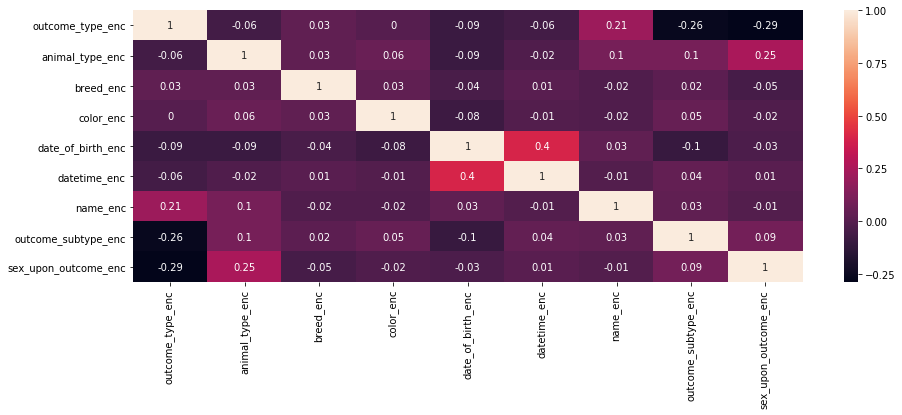

In [185]:
# Получим корреляционную матрицу всех признаков
correlation_matrix = df2.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(15,5)) 
sns.heatmap(data=correlation_matrix, annot=True)

По корреляционной матрице выявляется случайная линейная связь outcome_type_enc с 'outcome_subtype_enc' и 'sex_upon_outcome_enc' (непрямая корреляционная связь -0.26 и -0.29)

## 5. Моделирование 

In [186]:
# Разбиваем данные (df2) на признаки и целевой показатель
x_columns =[x for x in df2.columns if x != 'outcome_type_enc']
X = df2[x_columns]
y = df2.loc[:,['outcome_type_enc']].iloc[:,0].values

In [187]:
from sklearn.model_selection import train_test_split
# Делим данные на обучающую (75% данных) и тестовую (25% данных) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [188]:
from sklearn.ensemble import RandomForestClassifier
# Создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

In [189]:
# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
# результаты моделирования на тестовых данных
model_pred = model.predict(X_test)

In [191]:
# это оценка целевого признака для тестовых данных
model_pred

array([3, 0, 0, ..., 0, 0, 8])

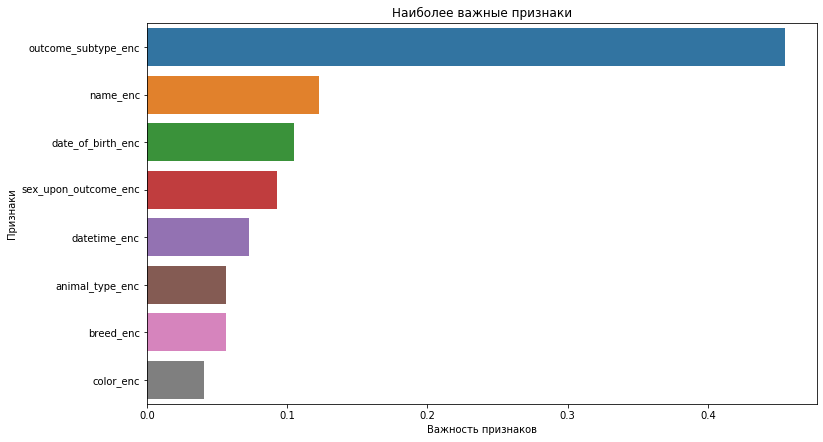

In [192]:
# гистограмма наиболее важных признаков
headers = list(X_train.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title("Наиболее важные признаки")
#plt.legend()
plt.show()

**Оценка качества модели RandomForestClassifier**

In [193]:
# оценка качества модели
from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      8270
           1       0.87      0.74      0.80       163
           2       0.60      0.65      0.62        77
           3       0.98      0.96      0.97      1549
           5       0.00      0.00      0.00         8
           6       0.74      0.70      0.72      3661
           7       0.00      0.00      0.00        47
           8       1.00      1.00      1.00      5775

    accuracy                           0.89     19550
   macro avg       0.63      0.62      0.62     19550
weighted avg       0.88      0.89      0.89     19550



/Users/louisxvi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Модель RandomForestClassifier дала точность предсказания порядка 88%**

In [194]:
# точность модели RandomForestClassifier для обучающих данных))) =1)))
model.score(X_train, y_train)

0.9999829491201746

In [195]:
# точность модели RandomForestClassifier для тестовых данных
model.score(X_test, y_test)

0.887161125319693

**Полученная модель позволяет с точностью 88% по определенным признакам предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”)**

**Можно отобразить классы (их всего 9) в 3D пространстве наиболее важных векторов (outcome_subtype, name, date_of_birth):**

In [197]:
df2.outcome_type_enc.unique()

array([8, 0, 3, 6, 1, 2, 5, 7])

In [198]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78198 entries, 0 to 78255
Data columns (total 9 columns):
outcome_type_enc        78198 non-null int64
animal_type_enc         78198 non-null int64
breed_enc               78198 non-null int64
color_enc               78198 non-null int64
date_of_birth_enc       78198 non-null int64
datetime_enc            78198 non-null int64
name_enc                78198 non-null int64
outcome_subtype_enc     78198 non-null int64
sex_upon_outcome_enc    78198 non-null int64
dtypes: int64(9)
memory usage: 6.0 MB


In [199]:
df2.head()

,outcome_type_enc,animal_type_enc,breed_enc,color_enc,date_of_birth_enc,datetime_enc,name_enc,outcome_subtype_enc,sex_upon_outcome_enc
0,8,1,937,321,4624,12401,14574,12,1
1,8,2,255,474,4016,1642,10514,12,3
2,0,2,1613,119,4161,9927,2620,19,2
3,8,2,1468,463,1401,10447,11138,12,2
4,3,4,253,122,4443,11509,14574,14,4


In [200]:
# Выделим колонки в отдельный список
headers = list(df2.columns.values)

In [201]:
# Нормализуем данные 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df2)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8
0,1.00,-0.5,-0.118947,0.225191,0.576005,-0.614636,1.000000,0.263158,-0.6
1,1.00,0.0,-0.760226,0.809160,0.368780,-0.948975,0.442843,0.263158,0.2
2,-1.00,0.0,0.516690,-0.545802,0.418200,-0.691516,-0.640456,1.000000,-0.2
3,1.00,0.0,0.380348,0.767176,-0.522495,-0.675357,0.528475,0.263158,-0.2
4,-0.25,1.0,-0.762106,-0.534351,0.514315,-0.642356,1.000000,0.473684,0.6


In [202]:
# восстановление заголовков столбцов
df_norm.columns = headers
df_norm.head()

,outcome_type_enc,animal_type_enc,breed_enc,color_enc,date_of_birth_enc,datetime_enc,name_enc,outcome_subtype_enc,sex_upon_outcome_enc
0,1.00,-0.5,-0.118947,0.225191,0.576005,-0.614636,1.000000,0.263158,-0.6
1,1.00,0.0,-0.760226,0.809160,0.368780,-0.948975,0.442843,0.263158,0.2
2,-1.00,0.0,0.516690,-0.545802,0.418200,-0.691516,-0.640456,1.000000,-0.2
3,1.00,0.0,0.380348,0.767176,-0.522495,-0.675357,0.528475,0.263158,-0.2
4,-0.25,1.0,-0.762106,-0.534351,0.514315,-0.642356,1.000000,0.473684,0.6


In [203]:
# нормированные данные 
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78198 entries, 0 to 78197
Data columns (total 9 columns):
outcome_type_enc        78198 non-null float64
animal_type_enc         78198 non-null float64
breed_enc               78198 non-null float64
color_enc               78198 non-null float64
date_of_birth_enc       78198 non-null float64
datetime_enc            78198 non-null float64
name_enc                78198 non-null float64
outcome_subtype_enc     78198 non-null float64
sex_upon_outcome_enc    78198 non-null float64
dtypes: float64(9)
memory usage: 5.4 MB


In [204]:
# кодирование целевого признака для графики 'вручную' выше это сделали автоматом
#dct={'Transfer':0, 'Adoption':1, 'Euthanasia':2, 'Return to Owner':3, 'Died':4,
#       'Disposal':5, 'Relocate':6, 'Missing':7, 'Rto-Adopt':8}
#df2['outcome_type_enc'] = df2['outcome_type'].map(dct)

In [205]:
# получим данные без категориальных столбцов (закодированные)
#df2 = df2.drop('outcome_type', axis = 1)
#df2.head(7)

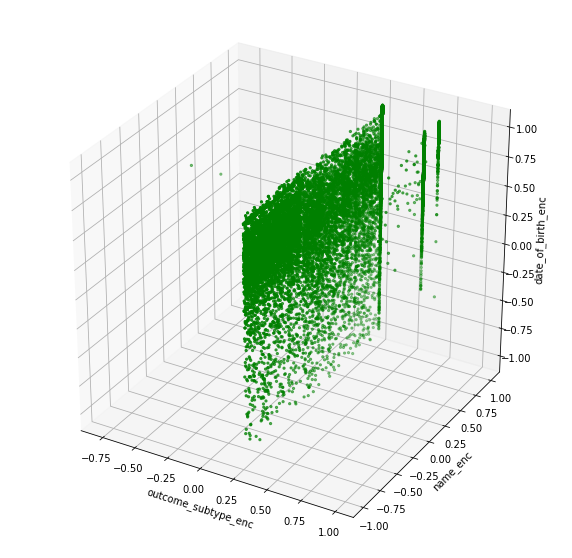

In [207]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
colors = ['r', 'g', 'b', 'y', 'b', 'm', '#17becf','#17beff','#17bfff']
for i in range(8):
    a = df_norm.loc[df_norm['outcome_type_enc'] == i, 'outcome_subtype_enc']
    b = df_norm.loc[df_norm['outcome_type_enc'] == i, 'name_enc']
    c = df_norm.loc[df_norm['outcome_type_enc'] == i, 'date_of_birth_enc']
  # a = df_graph.loc[df_graph['target'] == i, 'outcome_subtype_enc']
  # b = df_graph.loc[df_graph['target'] == i, 'name_enc']
  # c = df_graph.loc[df_graph['target'] == i, 'date_of_birth_enc']
    ax.scatter(a, b, c, s=5.0, c=colors[i])
ax.set_xlabel('outcome_subtype_enc')
ax.set_ylabel('name_enc')
ax.set_zlabel('date_of_birth_enc')
plt.show()

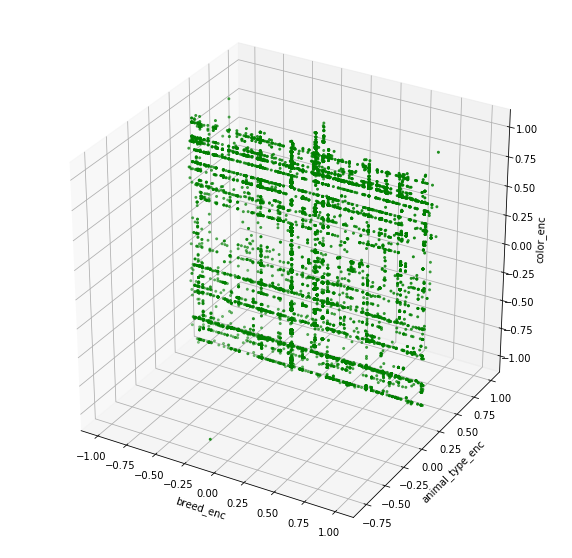

In [224]:
# график по другим признакам

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', 'y', 'b', 'm', '#17becf','#17beff','#17bfff']

for i in range(8):
    a = df_norm.loc[df_norm['outcome_type_enc'] == i, 'breed_enc']
    b = df_norm.loc[df_norm['outcome_type_enc'] == i, 'outcome_subtype_enc']
    c = df_norm.loc[df_norm['outcome_type_enc'] == i, 'color_enc']
 # a = df_graph.loc[df_graph['target'] == i, 'breed_enc']
 # b = df_graph.loc[df_graph['target'] == i, '']
 # c = df_graph.loc[df_graph['target'] == i, 'color_enc']

    ax.scatter(a, b, c, s=4, c=colors[i])

ax.set_xlabel('breed_enc')
ax.set_ylabel('animal_type_enc')
ax.set_zlabel('color_enc')
plt.show()

## Метод главных компонент 
(построим модель PCA)

In [209]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78198 entries, 0 to 78255
Data columns (total 9 columns):
outcome_type_enc        78198 non-null int64
animal_type_enc         78198 non-null int64
breed_enc               78198 non-null int64
color_enc               78198 non-null int64
date_of_birth_enc       78198 non-null int64
datetime_enc            78198 non-null int64
name_enc                78198 non-null int64
outcome_subtype_enc     78198 non-null int64
sex_upon_outcome_enc    78198 non-null int64
dtypes: int64(9)
memory usage: 6.0 MB


In [211]:
# нормируем df2 c учетом целевого признака

In [212]:
# Выделим колонки в отдельный список
headers = list(df2.columns.values)

In [213]:
# Нормализуем данные 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df2)
df_norm2 = pd.DataFrame(np_scaled)
df_norm2.head()

,0,1,2,3,4,5,6,7,8
0,1.00,-0.5,-0.118947,0.225191,0.576005,-0.614636,1.000000,0.263158,-0.6
1,1.00,0.0,-0.760226,0.809160,0.368780,-0.948975,0.442843,0.263158,0.2
2,-1.00,0.0,0.516690,-0.545802,0.418200,-0.691516,-0.640456,1.000000,-0.2
3,1.00,0.0,0.380348,0.767176,-0.522495,-0.675357,0.528475,0.263158,-0.2
4,-0.25,1.0,-0.762106,-0.534351,0.514315,-0.642356,1.000000,0.473684,0.6


In [214]:
# восстановление заголовков столбцов
df_norm2.columns = headers
df_norm2.head()

,outcome_type_enc,animal_type_enc,breed_enc,color_enc,date_of_birth_enc,datetime_enc,name_enc,outcome_subtype_enc,sex_upon_outcome_enc
0,1.00,-0.5,-0.118947,0.225191,0.576005,-0.614636,1.000000,0.263158,-0.6
1,1.00,0.0,-0.760226,0.809160,0.368780,-0.948975,0.442843,0.263158,0.2
2,-1.00,0.0,0.516690,-0.545802,0.418200,-0.691516,-0.640456,1.000000,-0.2
3,1.00,0.0,0.380348,0.767176,-0.522495,-0.675357,0.528475,0.263158,-0.2
4,-0.25,1.0,-0.762106,-0.534351,0.514315,-0.642356,1.000000,0.473684,0.6


In [215]:
df_norm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78198 entries, 0 to 78197
Data columns (total 9 columns):
outcome_type_enc        78198 non-null float64
animal_type_enc         78198 non-null float64
breed_enc               78198 non-null float64
color_enc               78198 non-null float64
date_of_birth_enc       78198 non-null float64
datetime_enc            78198 non-null float64
name_enc                78198 non-null float64
outcome_subtype_enc     78198 non-null float64
sex_upon_outcome_enc    78198 non-null float64
dtypes: float64(9)
memory usage: 5.4 MB


In [216]:
principalComponents = pca.fit_transform(df_norm2)
projected_x = pd.DataFrame(data = principalComponents,
                           columns = ['atribute_1', 'atribute_2', 'atribute_3'])

После применения PCA осталось только 3 атрибута

In [217]:
projected_x['target'] = df_norm2.outcome_type_enc

In [218]:
projected_x.head()

,atribute_1,atribute_2,atribute_3,target
0,1.334173,0.276197,-0.371723,1.00
1,1.060417,1.042689,-0.347984,1.00
2,-1.120427,0.222839,0.754791,-1.00
3,1.189011,1.133932,-0.354480,1.00
4,-0.125340,-0.556170,-0.648362,-0.25


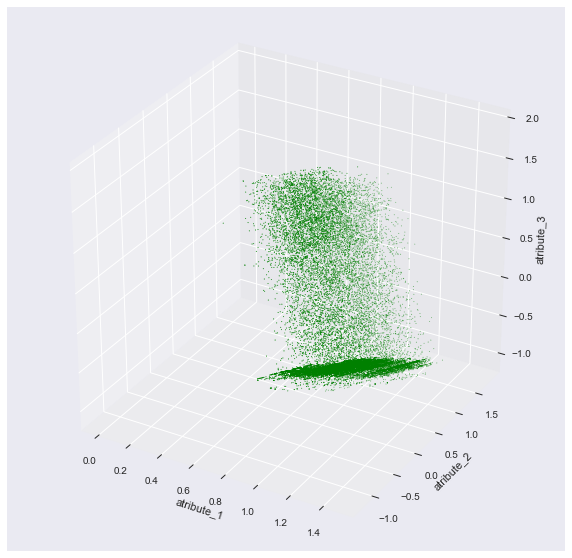

In [298]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r','g','b', '#17becf','#17beff','#17bfff', 'y', 'b',  'm']

for i in range(8):
    a = projected_x.loc[projected_x['target'] == i, 'atribute_1']
    b = projected_x.loc[projected_x['target'] == i, 'atribute_2']
    c = projected_x.loc[projected_x['target'] == i, 'atribute_3']
    ax.scatter(a, b, c,s=0.5, c=colors[i])

ax.set_xlabel('atribute_1')
ax.set_ylabel('atribute_2')
ax.set_zlabel('atribute_3')
plt.show()

**Метод главных компонент позволил увидеть особенностии данных в пространстве главных компонент**

## 6. Использование профайлера на этапе анализа данных

In [299]:
import pandas_profiling

In [300]:
df2.shape

(78198, 9)

In [301]:
df2.profile_report()